# Limpeza de texto

Remover pontuação e afins e deixar só palavras relevantes, possivelmente juntar alguns como sendo da mesma categoria, etc...

## Import libs

In [1]:
import pandas as pd

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

In [136]:
import nltk
from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

In [47]:
from collections import Counter

## Import data

In [2]:
tweets_path = './tweets_en_classification.csv'

In [3]:
tweets = pd.read_csv(tweets_path, index_col='Unnamed: 0').drop(columns='Unnamed: 0.1')

## Cleaning data

In [5]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21140 entries, 0 to 21139
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              21140 non-null  object 
 1   date            21140 non-null  object 
 2   username        21140 non-null  object 
 3   text            21140 non-null  object 
 4   hashtag         4830 non-null   object 
 5   geo             1 non-null      object 
 6   text_clean      21140 non-null  object 
 7   text_en         21140 non-null  object 
 8   classification  21140 non-null  object 
 9   score           21140 non-null  float64
dtypes: float64(1), object(9)
memory usage: 1.8+ MB


In [6]:
tweets.head(3)

,id,date,username,text,hashtag,geo,text_clean,text_en,classification,score
0,1213243065336582144,2020-01-03 23:37:42+00:00,adreciclarte,Olha que o Corona também está a ficar bonzinho...,NaN,NaN,Olha que o Corona também está a ficar bonzinho...,"Look, Corona is also looking good. If they let...",POSITIVE,0.999872
1,1213599942444539906,2020-01-04 23:15:48+00:00,food_i_do,Que escândalo! Parece que só agora é que o árb...,NaN,NaN,Que escândalo ! Parece que só agora é que o ár...,What a scandal! It seems that it is only now t...,NEGATIVE,0.996998
2,1213939014488788992,2020-01-05 21:43:09+00:00,CRbeiro,Corona meu mexicanozinho tu és do caralho pa!!...,NaN,NaN,Corona meu mexicanozinho tu és do caralho pa !...,Corona my little mexican you are fucking aweso...,POSITIVE,0.999818


In [7]:
tweets = tweets.drop(columns=['id', 'username', 'text', 'hashtag', 'geo', 'text_en'])

In [8]:
tweets.head(3)

,date,text_clean,classification,score
0,2020-01-03 23:37:42+00:00,Olha que o Corona também está a ficar bonzinho...,POSITIVE,0.999872
1,2020-01-04 23:15:48+00:00,Que escândalo ! Parece que só agora é que o ár...,NEGATIVE,0.996998
2,2020-01-05 21:43:09+00:00,Corona meu mexicanozinho tu és do caralho pa !...,POSITIVE,0.999818


In [9]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21140 entries, 0 to 21139
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            21140 non-null  object 
 1   text_clean      21140 non-null  object 
 2   classification  21140 non-null  object 
 3   score           21140 non-null  float64
dtypes: float64(1), object(3)
memory usage: 825.8+ KB


## Prepare data

In [10]:
map_dict = {'NEGATIVE': -1, 'POSITIVE': 1}

In [11]:
tweets.loc[:, 'classification'] = tweets.classification.map(map_dict)

In [12]:
tweets['date'] = pd.to_datetime(tweets['date'], errors= "coerce").dt.tz_localize(None)

In [13]:
tweets['weighted_classification'] = tweets.classification * tweets.score

In [14]:
months = [int(month) for month in sorted(tweets.date.dt.month.unique()[:-1])]

In [15]:
month_names = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho',
               'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']

In [19]:
for month in months:
    print(month, month_names[month - 1])

1 Janeiro
2 Fevereiro
3 Março
4 Abril
5 Maio
6 Junho
8 Agosto


## Tokenize

In [20]:
doc_list = tweets.text_clean.values.tolist()

In [21]:
len(doc_list)

21140

In [22]:
doc_len = [len(doc) for doc in doc_list]

<AxesSubplot:>

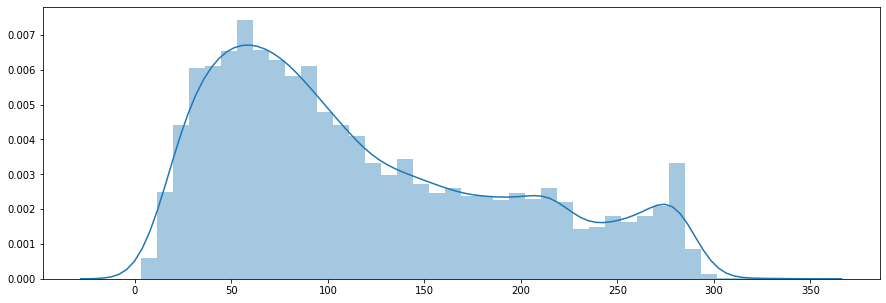

In [44]:
plt.figure(figsize=(15,5))
sns.distplot(doc_len)

In [32]:
doc_tokenized = [word_tokenize(doc) for doc in doc_list]

In [33]:
doc_token_len = [len(doc) for doc in doc_tokenized]

<AxesSubplot:>

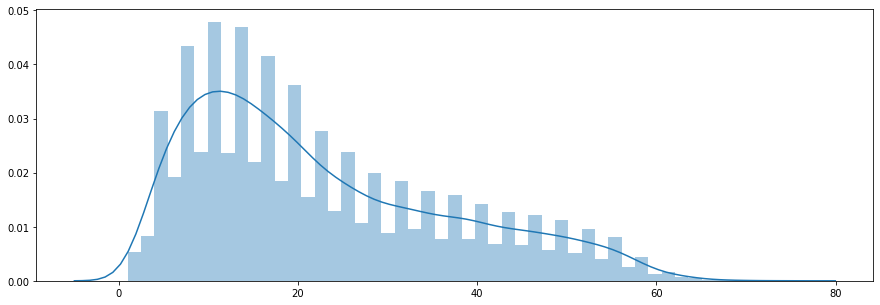

In [45]:
plt.figure(figsize=(15,5))
sns.distplot(doc_token_len)

In [53]:
all_tokens_raw = list()
for doc in doc_tokenized:
    all_tokens_raw.extend(doc)

In [55]:
len(all_tokens_raw)

477605

In [56]:
count_all_tokens_raw = Counter(all_tokens_raw)

In [58]:
count_all_tokens_raw.most_common(20)

[(',', 15425),
 ('de', 13958),
 ('.', 13010),
 ('a', 12681),
 ('o', 11030),
 ('que', 10390),
 ('e', 8564),
 ('do', 6354),
 ('em', 5216),
 ('não', 4833),
 ('!', 4752),
 ('é', 4532),
 ('corona', 4516),
 ('com', 4060),
 ('da', 3960),
 ('para', 3951),
 ('?', 3823),
 ('no', 2997),
 ('pandemia', 2822),
 ('um', 2737)]

## Remove punctuation

In [64]:
# also normalize spelling to lowercase
all_tokens_no_punctuation = [word.lower() for word in all_tokens_raw if word.isalpha()]

In [65]:
len(all_tokens_no_punctuation)

408872

In [66]:
count_all_tokens_no_punctuation = Counter(all_tokens_no_punctuation)

In [67]:
count_all_tokens_no_punctuation.most_common(20)

[('de', 14324),
 ('a', 14300),
 ('o', 13022),
 ('que', 10844),
 ('e', 9336),
 ('corona', 6683),
 ('do', 6473),
 ('não', 5736),
 ('em', 5629),
 ('é', 5219),
 ('com', 4300),
 ('para', 4148),
 ('da', 4048),
 ('no', 3296),
 ('se', 3292),
 ('pandemia', 3105),
 ('um', 2983),
 ('os', 2954),
 ('uma', 2824),
 ('por', 2650)]

## Remove stopwords

In [69]:
pt_stp_words = stopwords.words('portuguese')

In [73]:
pt_stp_words[:10]

['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um']

In [74]:
all_tokens_no_punctuation_stopwords = [word for word in all_tokens_no_punctuation if not word in pt_stp_words]

In [75]:
len(all_tokens_no_punctuation_stopwords)

239908

In [76]:
count_all_tokens_no_punctuation_stopwords = Counter(all_tokens_no_punctuation_stopwords)

In [77]:
count_all_tokens_no_punctuation_stopwords.most_common(20)

[('corona', 6683),
 ('pandemia', 3105),
 ('portugal', 1635),
 ('vírus', 1559),
 ('vai', 1376),
 ('coronavírus', 1374),
 ('ser', 1334),
 ('covid', 1275),
 ('q', 1228),
 ('casa', 1035),
 ('pessoas', 1023),
 ('agora', 983),
 ('todos', 929),
 ('pra', 910),
 ('ter', 881),
 ('dia', 858),
 ('fazer', 858),
 ('tudo', 817),
 ('sobre', 783),
 ('casos', 749)]

## Stemming

In [83]:
stemmer = nltk.stem.RSLPStemmer()

In [84]:
tokens_stem = [stemmer.stem(word) for word in all_tokens_no_punctuation_stopwords]

In [85]:
count_tokens_stem = Counter(tokens_stem)

In [86]:
count_tokens_stem.most_common(20)

[('cor', 6711),
 ('pandem', 3118),
 ('cas', 2164),
 ('tod', 1858),
 ('portug', 1639),
 ('víru', 1559),
 ('ser', 1427),
 ('faz', 1395),
 ('vai', 1381),
 ('coronavíru', 1374),
 ('dia', 1310),
 ('pod', 1306),
 ('covid', 1281),
 ('q', 1228),
 ('pesso', 1211),
 ('est', 1087),
 ('agor', 984),
 ('pass', 938),
 ('ter', 932),
 ('pra', 923)]

## Finetune with custom stopwords

In [120]:
custom_stp = ['portugal', 'vai', 'ser', 'q', 'agora', 'todos', 'pra', 'ter', 'dia', 'fazer',
              'tudo', 'sobre', 'ainda', 'hoje', 'vou', 'aqui', 'bem', 'ver', 'ir', 'brasil',
              'pode', 'porque', 'tá', 'n', 'assim', 'dias', 'vamos', 'nada', 'ficar', 'vão',
              'lá']

In [121]:
all_tokens_no_punctuation_stopwords_custom = [word for word in all_tokens_no_punctuation_stopwords if not word in custom_stp]

In [122]:
len(all_tokens_no_punctuation_stopwords_custom)

217139

In [123]:
count_all_tokens_no_punctuation_stopwords_custom = Counter(all_tokens_no_punctuation_stopwords_custom)

In [124]:
count_all_tokens_no_punctuation_stopwords_custom.most_common(20)

[('corona', 6683),
 ('pandemia', 3105),
 ('vírus', 1559),
 ('coronavírus', 1374),
 ('covid', 1275),
 ('casa', 1035),
 ('pessoas', 1023),
 ('casos', 749),
 ('coronavirus', 714),
 ('causa', 668),
 ('quarentena', 623),
 ('mundo', 610),
 ('saúde', 588),
 ('merda', 572),
 ('gente', 540),
 ('virus', 512),
 ('lisboa', 414),
 ('vida', 413),
 ('tempo', 410),
 ('país', 407)]

## Turn it into a function

In [142]:
def tokleanize(doc_list, stopwords):
    # tokenize docs
    doc_tokenized = [word_tokenize(doc) for doc in doc_list]
    # flatten to list of all tokens
    vocab_list = [y for x in doc_tokenized for y in x]
    # turn lowercase and remove anything that is not a word
    tokens_only_words = [word.lower() for word in vocab_list if word.isalpha()]
    # remove stopwords
    tokens_clean = [word for word in tokens_only_words if not word in stopwords]
    return tokens_clean

In [126]:
doc_list = tweets.text_clean.values.tolist()

In [127]:
pt_stp_words = stopwords.words('portuguese')

In [128]:
custom_stp_words = custom_stp = ['portugal', 'vai', 'ser', 'q', 'agora', 'todos', 'pra', 'ter', 'dia', 'fazer',
                                 'tudo', 'sobre', 'ainda', 'hoje', 'vou', 'aqui', 'bem', 'ver', 'ir', 'brasil',
                                 'pode', 'porque', 'tá', 'n', 'assim', 'dias', 'vamos', 'nada', 'ficar', 'vão',
                                 'lá']

In [129]:
pt_stp_words.extend(custom_stp_words)

In [143]:
full_vocab_clean = tokleanize(doc_list, pt_stp_words)

In [144]:
count_clean = Counter(full_vocab_clean)

In [145]:
count_clean.most_common(10)

[('corona', 6683),
 ('pandemia', 3105),
 ('vírus', 1559),
 ('coronavírus', 1374),
 ('covid', 1275),
 ('casa', 1035),
 ('pessoas', 1023),
 ('casos', 749),
 ('coronavirus', 714),
 ('causa', 668)]